# Part I - PISA 2012 Exploration 
## by Jamie Potter

## Introduction

The data are from the 2012 round of the Programme for International Student Assessment (PISA), a triennial international education survey organised by the Organisation for Economic Co-operation and Development (OECD). The aim is to provide meaningful international comparisons for the educational attainment of 15-16 year olds for participant nations.

Alongside a general questionnaire that quizzed pupils on various aspects of school life and life at home, pupils take a two hour computer-based test. Scores are then scaled so that the average in each of the three areas tested (mathematics, reading, science) have mean 500, standard deviation 100. Typically, the object of most media interest is the ranking that appears at the
end, where countries are ranked in terms of their mean scores. The 2012 survey also included a section on problem-solving.

The dataset was downloaded on 06/11/2021 from Udacity's server [here](https://s3.amazonaws.com/udacity-hosted-downloads/ud507/pisa2012.csv.zip).

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm

%matplotlib inline

# Import database. Note: encoding was in latin-1.
df = pd.read_csv('./data/pisa2012.csv', encoding='latin-1', sep=',', error_bad_lines=False,
                      index_col=False, dtype='unicode')

df.head()

C:\Users\jamie\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


Unnamed: 0      CNT SUBNATIO  STRATUM      OECD       NC SCHOOLID STIDSTD  \
0          1  Albania  0080000  ALB0006  Non-OECD  Albania  0000001   00001   
1          2  Albania  0080000  ALB0006  Non-OECD  Albania  0000001   00002   
2          3  Albania  0080000  ALB0006  Non-OECD  Albania  0000001   00003   
3          4  Albania  0080000  ALB0006  Non-OECD  Albania  0000001   00004   
4          5  Albania  0080000  ALB0006  Non-OECD  Albania  0000001   00005   

  ST01Q01 ST02Q01  ... W_FSTR75 W_FSTR76 W_FSTR77 W_FSTR78 W_FSTR79 W_FSTR80  \
0      10       1  ...  13.7954  13.9235  13.1249  13.1249   4.3389  13.0829   
1      10       1  ...  13.7954  13.9235  13.1249  13.1249   4.3389  13.0829   
2       9       1  ...  12.7307  12.7307  12.7307  12.7307   4.2436  12.7307   
3       9       1  ...  12.7307  12.7307  12.7307  12.7307   4.2436  12.7307   
4       9       1  ...  12.7307  12.7307  12.7307  12.7307   4.2436  12.7307   

  WVARSTRR VAR_UNIT SENWGT_STU  VER_STU  
0       19        1     0.2098  22NOV13  
1       19        1     0.2098  22NOV13  
2       19        1     0.1999  22NOV13  
3       19        1     0.1999  22NOV13  
4       19        1     0.1999  22NOV13  

[5 rows x 636 columns]

In [2]:
# Oh my! There's so many columns pandas doesn't even want to list them! 

print(df.columns.tolist())

['Unnamed: 0', 'CNT', 'SUBNATIO', 'STRATUM', 'OECD', 'NC', 'SCHOOLID', 'STIDSTD', 'ST01Q01', 'ST02Q01', 'ST03Q01', 'ST03Q02', 'ST04Q01', 'ST05Q01', 'ST06Q01', 'ST07Q01', 'ST07Q02', 'ST07Q03', 'ST08Q01', 'ST09Q01', 'ST115Q01', 'ST11Q01', 'ST11Q02', 'ST11Q03', 'ST11Q04', 'ST11Q05', 'ST11Q06', 'ST13Q01', 'ST14Q01', 'ST14Q02', 'ST14Q03', 'ST14Q04', 'ST15Q01', 'ST17Q01', 'ST18Q01', 'ST18Q02', 'ST18Q03', 'ST18Q04', 'ST19Q01', 'ST20Q01', 'ST20Q02', 'ST20Q03', 'ST21Q01', 'ST25Q01', 'ST26Q01', 'ST26Q02', 'ST26Q03', 'ST26Q04', 'ST26Q05', 'ST26Q06', 'ST26Q07', 'ST26Q08', 'ST26Q09', 'ST26Q10', 'ST26Q11', 'ST26Q12', 'ST26Q13', 'ST26Q14', 'ST26Q15', 'ST26Q16', 'ST26Q17', 'ST27Q01', 'ST27Q02', 'ST27Q03', 'ST27Q04', 'ST27Q05', 'ST28Q01', 'ST29Q01', 'ST29Q02', 'ST29Q03', 'ST29Q04', 'ST29Q05', 'ST29Q06', 'ST29Q07', 'ST29Q08', 'ST35Q01', 'ST35Q02', 'ST35Q03', 'ST35Q04', 'ST35Q05', 'ST35Q06', 'ST37Q01', 'ST37Q02', 'ST37Q03', 'ST37Q04', 'ST37Q05', 'ST37Q06', 'ST37Q07', 'ST37Q08', 'ST42Q01', 'ST42Q02', 'ST4

In [3]:
# And everything is a string:

print(list(df.dtypes))

[dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dty

Using pisadict2012.csv, I'm going throught the dataset to get an idea of how various variables are encoded and trying to think about what it would be interesting to investigate. Also, the technical report ('PISA-2012-technical-report-final.pdf') is helpful here, as it gives more information on exactly how the data are created and what they mean.

In [4]:
# Will pick out some survey questions just to get a flavour. Mainly I'm just looking at
# the dictionary spreadsheet and technical report

# 'AGE' is age (float)
# ST26Q01 is 'Possessions - own room'.
# ST27Q03 is 'How many - cars'
# ST35Q04 is 'Subjective Norms - Parents Believe Studying Mathematics Is Important'
# ST43Q05 is 'Perceived Control - If I Wanted I Could Perform Well'
# ST86Q01 is 'Student-Teacher Relation - Get Along with Teachers'
# IC11Q02 is 'Maths lessons - Calculation with numbers'
# 'PERSEV' is a numerical representation of self-reported perseverance
# 'OPENPS' is self-reported openness to proble-solving

(df.AGE.unique(),
df.ST26Q01.unique(), 
df.ST27Q04.unique(), 
df.ST35Q04.unique(), 
df.ST43Q05.unique(), 
df.ST86Q01.unique(),
df.IC11Q02.unique(),
df.PERSEV.unique(),
df.OPENPS.unique())

(array(['16.17', '15.58', '15.67', '15.5', '16.08', '15.83', '15.92', '16',
        '15.75', '16.25', '15.33', '15.42', '16.33', '15.25', '15.17', nan],
       dtype=object),
 array(['Yes', nan, 'No'], dtype=object),
 array(['None', 'Two', 'One', 'Three or more', nan], dtype=object),
 array(['Agree', 'Strongly agree', nan, 'Disagree', 'Strongly disagree'],
       dtype=object),
 array([nan, 'Agree', 'Strongly agree', 'Disagree', 'Strongly disagree'],
       dtype=object),
 array(['Agree', nan, 'Strongly agree', 'Strongly disagree', 'Disagree'],
       dtype=object),
 array([nan, 'No', 'Yes, but only the teacher demonstrated this ',
        'Yes, students did this'], dtype=object),
 array(['-0.3407', '1.3116', '0.9918', nan, '1.0819', '0.0511', '1.7171',
        '0.2586', '-0.1475', '-1.1395', '0.4795', '0.627', '0.432',
        '-0.5316', '-0.7236', '3.5286', '2.8608', '0.7205', '2.305',
        '-2.5786', '-0.0543', '3.2951', '-1.6047', '-1.9041', '-0.7828',
        '-1.1279', '-0.145

It seems to me that a good selection of variables to look at would be:

* 'AGE' - age
* 'ST04Q01' - sex
* 'HISCED' - highest level of education parents achieved
* 'ST09Q01' - number of whole days spent being truant
* 'ST26Q01' - has desk at home to work on
* 'ST26Q02' - has own room at home
* 'ST27Q01' - number of mobiles in the household
* 'ST27Q02' - number of TVs in the household
* 'ST27Q03' - number of computers in the household
* 'ST28Q01' - number of books in the household
* 'PERSEV' - self-reported perseverance
* 'OPENPS' - self-reported openness to problem-solving

We need to look at response variables now.

In [5]:
# Look at the 'Plausible value' section to see if I can grok what's going on
df[['PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH']].value_counts()


PV1MATH   PV2MATH   PV3MATH   PV4MATH   PV5MATH 
100.7244  148.2396  193.418   187.1865  124.0925    1
514.1845  525.8685  520.416   504.8372  483.027     1
          535.2158  499.3846  543.0051  474.4586    1
          534.4368  521.9738  499.3846  519.637     1
          533.6579  536.7736  530.5421  550.7945    1
                                                   ..
420.2446  326.7721  324.4353  371.9505  334.5615    1
          298.7303  370.3926  330.6668  360.2664    1
420.1667  514.4181  455.9978  434.1876  438.8612    1
          506.6288  455.9978  466.124   449.7663    1
98.5434   161.6373  132.8166  213.8261  125.0273    1
Length: 485490, dtype: int64

Ah, so what's going on here is that the researchers have made an adjustment for the fact that they're only sampling each student for a very limited amount of time, and so instead of giving each one a single score, they're sampling 5 times from the most plausible distribution. This will not give individual students an accurate reflection of their ability, but it will make the group level data more accurate. 

So we have PV1MATH to PV5MATH for mathematics, PV1SCIE to PV5SCIE for science, and PV1READ to PV5READ for reading. I can't seem to find the scores for the problem-solving thing. Apparently they're supposed to be under PV1CPRO to PV5CPRO, but they're not here. What I'll eventually do is work out the mean of the five plausible scores for each student for the three scores we do have, and I'll use that as the response variables from now on.

Trying now to understand the rather extensive set of codes for 'BRR-Fay' Weights.

In [6]:
# Look at the BRR-Fay weights.

df[['W_FSTUWT', 'W_FSTR20', 'W_FSTR21']].sample(5)

W_FSTUWT  W_FSTR20  W_FSTR21
481634  220.9183  331.3775  110.4592
81148    32.4294   16.2147    48.644
213980    8.8099    4.2838    4.2888
287287    49.987   24.3741     70.69
24287      8.231   14.3134   13.6055

These Fay's Balanced Repeated Replication (BRR) Weights are a way of estimating the variability of statistics obtained by stratified sampling. You need to use this if you're going to generate any sort of inferences at all about the populations involved in the survey. This is taking me well beyond my competence level, however, so I'll just stick to talking about the dataset directly!

What I'm going to do now is start to build a restricted dataframe with only a selection of variables. 

In [7]:
# Selecting the columns I want.
df2 = df[['Unnamed: 0', 'AGE', 'ST04Q01', 'HISCED', 'ST09Q01', 'ST26Q01', 'ST26Q02',
          'ST27Q01', 'ST27Q02', 'ST27Q03', 'ST28Q01', 'PERSEV', 'OPENPS', 'WEALTH',
          'PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH', 
          'PV1READ', 'PV2READ', 'PV3READ', 'PV4READ', 'PV5READ',
          'PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE']].copy()

# Calculating mean plausible scores for Maths, Reading and Science
df2['PV1MATH']=df2['PV1MATH'].astype('float')
df2['PV2MATH']=df2['PV2MATH'].astype('float')
df2['PV3MATH']=df2['PV3MATH'].astype('float')
df2['PV4MATH']=df2['PV4MATH'].astype('float')
df2['PV5MATH']=df2['PV5MATH'].astype('float')
df2['MATHSCORE'] = (df2['PV1MATH'] + df2['PV2MATH'] + df2['PV3MATH'] 
                    + df2['PV4MATH']+df2['PV5MATH'])/5
df2['PV1READ']=df2['PV1READ'].astype('float')
df2['PV2READ']=df2['PV2READ'].astype('float')
df2['PV3READ']=df2['PV3READ'].astype('float')
df2['PV4READ']=df2['PV4READ'].astype('float')
df2['PV5READ']=df2['PV5READ'].astype('float')
df2['READSCORE'] = (df2['PV1READ'] + df2['PV2READ'] + df2['PV3READ'] 
                    + df2['PV4READ']+df2['PV5READ'])/5
df2['PV1SCIE']=df2['PV1SCIE'].astype('float')
df2['PV2SCIE']=df2['PV2SCIE'].astype('float')
df2['PV3SCIE']=df2['PV3SCIE'].astype('float')
df2['PV4SCIE']=df2['PV4SCIE'].astype('float')
df2['PV5SCIE']=df2['PV5SCIE'].astype('float')
df2['SCISCORE'] = (df2['PV1SCIE'] + df2['PV2SCIE'] + df2['PV3SCIE'] 
                   + df2['PV4SCIE']+df2['PV5SCIE'])/5

# Dropping the plausible value columns
df2.drop(columns=['PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH', 
                  'PV1READ', 'PV2READ', 'PV3READ', 'PV4READ', 'PV5READ',
                  'PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE'], inplace=True)

# Giving the columns more intelligible names
df2.columns = ['ID', 'age', 'sex', 'highest_par_ed', 'day_truant', 'desk', 'own_room',
               'mobiles', 'tvs', 'computers', 'books', 'persev', 'prob_solv_open', 'wealth',
               'math_score', 'read_score', 'sci_score']

# Setting the index to the first column
df2.set_index('ID', inplace=True)

# Checking
df2.sample(5)

age   sex     highest_par_ed day_truant desk own_room  \
ID                                                                
254303  15.92  Male        ISCED 5A, 6     None    Yes       No   
212415  15.83  Male  ISCED 3A, ISCED 4     None    Yes      Yes   
223863  16.08  Male  ISCED 3A, ISCED 4     None     No      Yes   
370050  15.83  Male           ISCED 5B     None    Yes      Yes   
184532   15.5  Male           ISCED 5B     None    Yes      Yes   

              mobiles  tvs computers           books   persev prob_solv_open  \
ID                                                                             
254303  Three or more  Two       One    11-25 books   -1.1279        -1.5946   
212415  Three or more  Two       Two   26-100 books   -0.3407        -0.5433   
223863            Two  One      None   26-100 books       NaN            NaN   
370050  Three or more  Two       One    11-25 books    0.7205         0.4639   
184532  Three or more  One       Two  101-200 books       NaN            NaN   

       wealth  math_score  read_score  sci_score  
ID                                                
254303  -0.19   471.49868   428.62138  458.54158  
212415   -0.5   497.90464   467.27512  520.92504  
223863  -3.16   482.63748   505.12694  518.12758  
370050  -0.51   487.31108   465.67126  519.71282  
184532  -0.81   504.91510   490.13058  532.02162

It occurs to me that it might be useful to have an overall score for each student, if only for exploratory purposes. An unweighted average of sci, math and reading is more or less appropriate.

In [8]:
df2['overall_score'] = (df2['math_score'] + df2['sci_score'] + df2['read_score'])/3

Now I need to start cleaning the data so that all my columns are the right data types. I'll just go through these in order.

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 485490 entries, 1 to 485490
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   age             485374 non-null  object 
 1   sex             485490 non-null  object 
 2   highest_par_ed  473091 non-null  object 
 3   day_truant      479131 non-null  object 
 4   desk            473079 non-null  object 
 5   own_room        469693 non-null  object 
 6   mobiles         477079 non-null  object 
 7   tvs             476548 non-null  object 
 8   computers       473459 non-null  object 
 9   books           473765 non-null  object 
 10  persev          313172 non-null  object 
 11  prob_solv_open  312766 non-null  object 
 12  wealth          479597 non-null  object 
 13  math_score      485490 non-null  float64
 14  read_score      485490 non-null  float64
 15  sci_score       485490 non-null  float64
 16  overall_score   485490 non-null  float64
dtypes: float64(4), 

In [10]:
# Two obvious data type changes to make straight away:

df2.age = df2.age.astype('float')
df2.sex = df2.sex.astype('category')

In [11]:
# Need to change dtype of highest_par_ed, so checking values
df2.highest_par_ed.value_counts(sort=False)

ISCED 3A, ISCED 4    123304
ISCED 5A, 6          159942
ISCED 3B, C           30469
ISCED 2               51506
ISCED 5B              74131
None                   8455
ISCED 1               25284
Name: highest_par_ed, dtype: int64

In [12]:
# Defining the order of the highest_par_ed factor:
cat = pd.CategoricalDtype(categories = ['None', 'ISCED 1', 'ISCED 2', 'ISCED 3B, C', 
                                                'ISCED 3A, ISCED 4', 'ISCED 5B', 'ISCED 5A, 6'],
                                 ordered = True)

# Changing the type of the variable.
df2.highest_par_ed = df2.highest_par_ed.astype(cat)

#Checking to see if it's worked
df2.highest_par_ed.value_counts(sort=False)

None                   8455
ISCED 1               25284
ISCED 2               51506
ISCED 3B, C           30469
ISCED 3A, ISCED 4    123304
ISCED 5B              74131
ISCED 5A, 6          159942
Name: highest_par_ed, dtype: int64

In [13]:
# Need to change dtype of day_truant, so checking values
df2.day_truant.value_counts(sort=False)

None                     385998
One or two times          75969
Three or four times       10882
Five or more times         6282
Name: day_truant, dtype: int64

In [14]:
# Repeat process for day_truant. Unfortunately, there was some trailing whitespace that had to be
# stripped here to get it to work

cat = pd.api.types.CategoricalDtype(categories = ['None', 'One or two times', 'Three or four times', 'Five or more times'], ordered = True)
df2['day_truant']=df2['day_truant'].str.rstrip().astype(cat)

#Checking to see if it's worked
df2.day_truant.value_counts(sort=False)

None                   385998
One or two times        75969
Three or four times     10882
Five or more times       6282
Name: day_truant, dtype: int64

In [15]:
# Need to change desk, so checking values
df2.desk.value_counts(sort=False)

Yes    419033
No      54046
Name: desk, dtype: int64

In [16]:
# Repeat process for desk

cat = pd.api.types.CategoricalDtype(categories = ['No', 'Yes'], ordered = True)
df2['desk']=df2['desk'].astype(cat)

#Checking to see if it's worked
df2.desk.value_counts(sort=False)

No      54046
Yes    419033
Name: desk, dtype: int64

In [17]:
# Need to change own_room, so checking values
df2.own_room.value_counts(sort=False)

No      97452
Yes    372241
Name: own_room, dtype: int64

In [18]:
# Repeat process for own_room

df2['own_room']=df2['own_room'].astype(cat)

#Checking to see if it's worked
df2.own_room.value_counts(sort=False)

No      97452
Yes    372241
Name: own_room, dtype: int64

In [19]:
# Need to change mobiles, so checking values
df2.mobiles.value_counts(sort=False)

Two               46793
Three or more    397878
One               25325
None               7083
Name: mobiles, dtype: int64

In [20]:
# Repeat process for mobiles

cat = pd.api.types.CategoricalDtype(categories = ['None', 'One', 'Two', 'Three or more'], ordered = True)
df2['mobiles']=df2['mobiles'].astype(cat)

#Checking to see if it's worked
df2.mobiles.value_counts(sort=False)

None               7083
One               25325
Two               46793
Three or more    397878
Name: mobiles, dtype: int64

In [21]:
# Need to change tvs, so checking values
df2.tvs.value_counts(sort=False)

One              100276
Three or more    206445
Two              163013
None               6814
Name: tvs, dtype: int64

In [22]:
# Repeat process for tvs

df2['tvs']=df2['tvs'].astype(cat)

#Checking to see if it's worked
df2.tvs.value_counts(sort=False)

None               6814
One              100276
Two              163013
Three or more    206445
Name: tvs, dtype: int64

In [23]:
# Need to change computers, so checking values
df2.computers.value_counts(sort=False)

None              52323
Three or more    150086
Two              130808
One              140242
Name: computers, dtype: int64

In [24]:
# Repeat process for computers

df2['computers']=df2['computers'].astype(cat)

#Checking to see if it's worked
df2.computers.value_counts(sort=False)

None              52323
One              140242
Two              130808
Three or more    150086
Name: computers, dtype: int64

In [25]:
# Need to change books, so checking values
df2.books.value_counts(sort=False)

0-10 books              95042
201-500 books           49267
More than 500 books     28587
11-25 books             97335
101-200 books           68350
26-100 books           135184
Name: books, dtype: int64

In [26]:
# Repeat process for books. Again there was a trailing whitespace issue.

cat = pd.api.types.CategoricalDtype(categories = ['0-10 books', '11-25 books', '26-100 books',
                                                  '101-200 books', '201-500 books', 
                                                  'More than 500 books'], ordered = True)
df2['books']=df2['books'].str.rstrip().astype(cat)

#Checking to see if it's worked
df2.books.value_counts(sort=False)

0-10 books              95042
11-25 books             97335
26-100 books           135184
101-200 books           68350
201-500 books           49267
More than 500 books     28587
Name: books, dtype: int64

In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 485490 entries, 1 to 485490
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   age             485374 non-null  float64 
 1   sex             485490 non-null  category
 2   highest_par_ed  473091 non-null  category
 3   day_truant      479131 non-null  category
 4   desk            473079 non-null  category
 5   own_room        469693 non-null  category
 6   mobiles         477079 non-null  category
 7   tvs             476548 non-null  category
 8   computers       473459 non-null  category
 9   books           473765 non-null  category
 10  persev          313172 non-null  object  
 11  prob_solv_open  312766 non-null  object  
 12  wealth          479597 non-null  object  
 13  math_score      485490 non-null  float64 
 14  read_score      485490 non-null  float64 
 15  sci_score       485490 non-null  float64 
 16  overall_score   485490 non-null  float64 
d

In [28]:
# Nearly there. Just change perseverance and openness to problem-solving to floats

df2.wealth = df2.wealth.astype('float')
df2.persev = df2.persev.astype('float')
df2.prob_solv_open = df2.prob_solv_open.astype('float')

df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 485490 entries, 1 to 485490
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   age             485374 non-null  float64 
 1   sex             485490 non-null  category
 2   highest_par_ed  473091 non-null  category
 3   day_truant      479131 non-null  category
 4   desk            473079 non-null  category
 5   own_room        469693 non-null  category
 6   mobiles         477079 non-null  category
 7   tvs             476548 non-null  category
 8   computers       473459 non-null  category
 9   books           473765 non-null  category
 10  persev          313172 non-null  float64 
 11  prob_solv_open  312766 non-null  float64 
 12  wealth          479597 non-null  float64 
 13  math_score      485490 non-null  float64 
 14  read_score      485490 non-null  float64 
 15  sci_score       485490 non-null  float64 
 16  overall_score   485490 non-null  float64 
d

In [29]:
# Quick check for duplicated values. Not expecting any, but doesn't hurt to check.

df2[df2.duplicated()]

Empty DataFrame
Columns: [age, sex, highest_par_ed, day_truant, desk, own_room, mobiles, tvs, computers, books, persev, prob_solv_open, wealth, math_score, read_score, sci_score, overall_score]
Index: []

In [30]:
# Writing to a new CSV file

df2.to_csv('./data/PISA_clean.csv')

The data are now ready for some exploratory analysis. To finish off this section on Data Wrangling, let's summarise what we know so far.

### What is the structure of your dataset?

Each row is an observation, i.e. the values for a single student. Orignally, all the columns were strings recording demographic information, then answers to survey questions, then the key values of interest, the plausible values for maths, science, and reading, following those. Finally, there are then 80 columns or so used to assign weights for that student's scores so population-level inferences can be made.

However, I've restricted the data to only 16 variables of interest, assigning them the correct data types in the process. Each row is still a single student, so the basic structure is still the same. 

### What is/are the main feature(s) of interest in your dataset?

The key response variables in the original dataset were the plausible values for maths, science and reading. Of interest would be any sort of factor that displays some sort of relationship with those scores. As I stated in the introduction, international comparisons are typically the main point of interest for the media, but I've chosen to avoid making such comparisons because I am not competent in terms of weighting each score correctly. Instead, I'll be looking at patterns inside the dataset.

Moreover, I'm working with four response variables here - math_score, sci_score, read_score, and overall_score. The first three are averages of the plausible values generated from the theorised distribution for each student based on their result, and then the overall is a simple average of those three. I would imagine, however, that I'll only be using the last variable for exploratory purposes as it's a somewhat arbitrary metric (why should reading, science and mathematics be weighted equally?). 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

There are many survey questions that I'm anticipating it would be interesting to pursue: whether they have a desk at home, how many televisions they have at home, use of one-player games or collaborative games at home, if either of their parents have an undergraduate (or higher) education (ISCED Level 6), wealth, age (do older children perform better?), psychological factors (locus of control, perseverance, openness). It's possibly also worth exploring the interaction between gender and the relative scores, since a historical pattern is that students who perform worse at reading but better at maths/science tend to be male, but there may be other wrinkles with gender.

What I've done is created a smaller dataframe with these columns only so as to make things more workable as I proceed.

## Univariate Exploration

I'll start by examining our response variables.

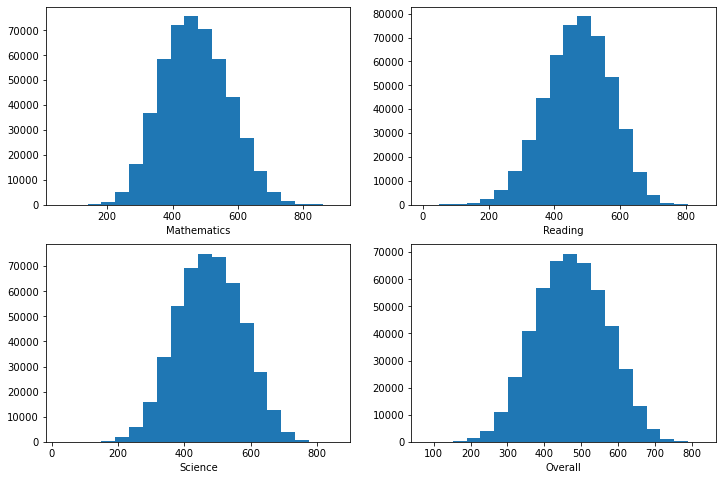

In [31]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.hist(df2['math_score'], bins = 20)
plt.xlabel('Mathematics')
plt.subplot(2,2,2)
plt.hist(df2['read_score'], bins = 20)
plt.xlabel('Reading')
plt.subplot(2,2,3)
plt.hist(df2['sci_score'], bins = 20)
plt.xlabel('Science')
plt.subplot(2,2,4)
plt.hist(df2['overall_score'], bins = 20)
plt.xlabel('Overall');

As noted in the introduction, the scales are normed so that the mean is 500 and the standard deviation is 100, which you can see reflected in their descriptive statistics below.

In [32]:
df2[['math_score', 'read_score', 'sci_score', 'overall_score']].describe()

math_score     read_score      sci_score  overall_score
count  485490.000000  485490.000000  485490.000000  485490.000000
mean      469.651234     472.006964     475.808094     472.488764
std       100.786610      98.863310      97.998470      96.036271
min        54.767080       6.445400      25.158540      77.114593
25%       396.019620     405.044200     405.762800     403.992595
50%       465.734520     475.477980     475.512860     472.046460
75%       540.123060     542.831195     546.381920     541.455700
max       903.107960     849.359740     857.832900     826.592027

Thus it is not altoghether surprising that we're seeing the shape we're seeing - normally-distributed, symmetrical distributions centred on 500 with standard deviation 100. I'll now go through the explanatory variables in order, starting with age. Although this is a float, it's going to end up looking more like a category variable, I suspect, simply because it's only working with age in months.

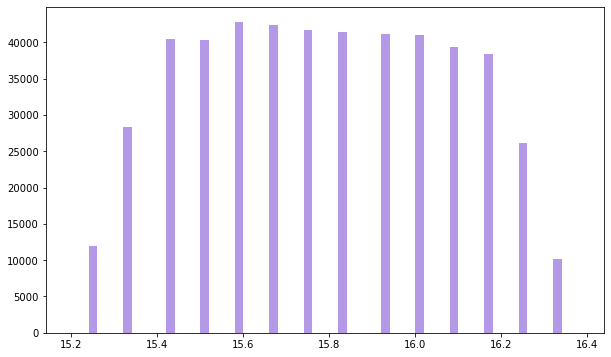

In [33]:
plt.figure(figsize=(10,6))
plt.hist(df2['age'], bins=np.arange(15.2, 16.4, 0.02), color=(0.7,0.6,0.9));

As suspected, the ages show this discretised form. It's not a big problem, however. Another slight curio here in that the age range isn't evenly distributed across 12 months, presumably because of slightly different year group arrangements from country to country, or something of that nature. Now onto the wealth of the participants. How is it distributed?

In [34]:
df2.wealth.describe()

count    479597.00000
mean         -0.33701
std           1.21530
min          -6.65000
25%          -1.04000
50%          -0.30000
75%           0.43000
max           3.25000
Name: wealth, dtype: float64

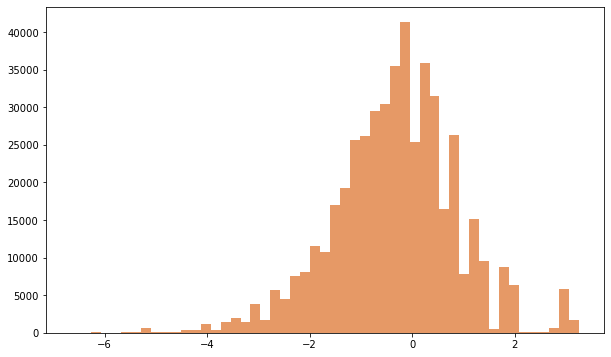

In [35]:
plt.figure(figsize=(10,6))
plt.hist(df2['wealth'], color=(0.9,0.6,0.4), bins=51);

Wealth is an index PISA generates from asking about household possessions (TVs, mobile phones, cars, having one's own room, culturally-specific items). It is roughly normally-distributed, centred around -0.34, with a standard deviation of 1.22.

Onto the sex of the students in the survey. What can we say about this?

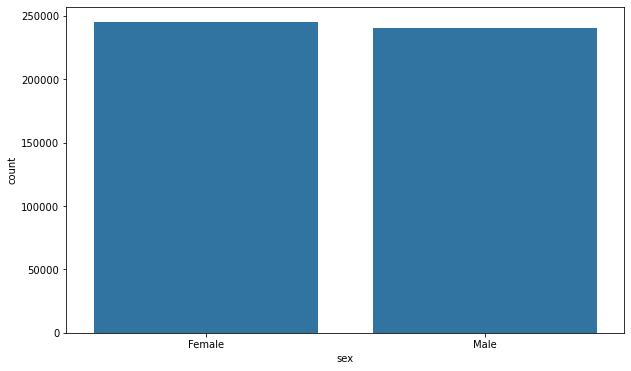

In [36]:
plt.figure(figsize=(10,6))
sb.countplot(data=df2, x='sex', color=sb.color_palette()[0]);

This is a contender for the least interesting graph in history. Moving swiftly on to highest parental education.

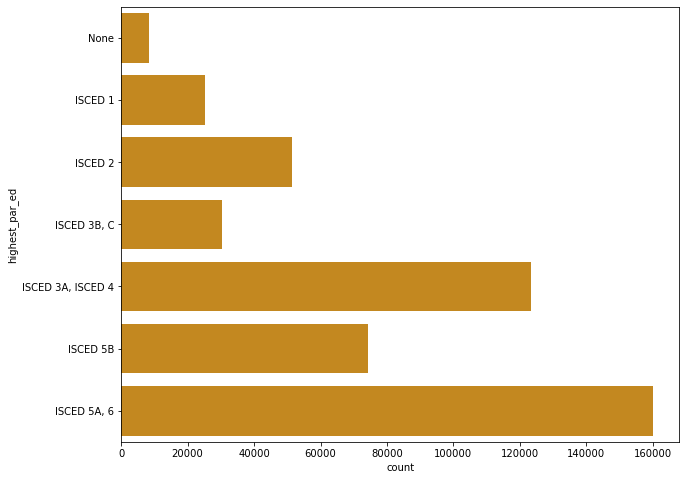

In [37]:
plt.figure(figsize=(10,8))
sb.countplot(data=df2, y='highest_par_ed', color=sb.color_palette('colorblind')[1]);

The modal group is 'ISCED 5a, 6'. Just to explain these categories, the following is taken from the PISA 2012 Technical Report:

* ISCED 1 - primary education
* ISCED 2 - lower secondary
* ISCED 3B, C - vocational/pre-vocational upper secondary
* ISCED 3A, ISCED 4 - general upper secondary, or non-tertiary post-secondary
* ISCED 5B - vocational tertiary
* ISCED 5A, 6 - theoretically oriented tertiary and post-graduate

As you can see, the modal class is the last one. I found this a little surprising as I didn't think the proportion of people with that level of education would be that high, even taking into account that it's choosing the highest level from both the parents.

Onto number of whole days truant.

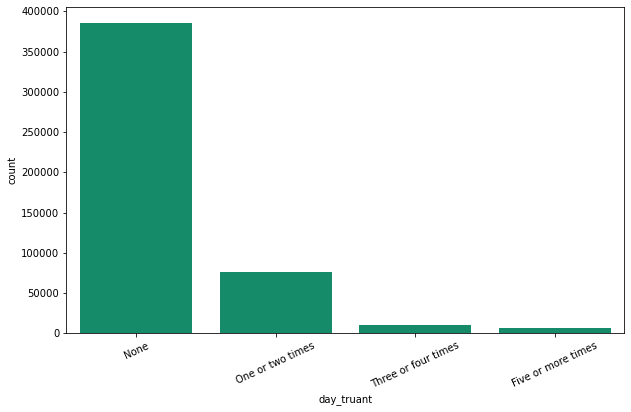

In [38]:
plt.figure(figsize=(10,6))
sb.countplot(data=df2, x='day_truant', color=sb.color_palette('colorblind')[2])
plt.xticks(rotation=25);

Here one can see that the vast majority of students surveyed have never had a whole day of unexcused absence from school. 

For the possessions variables, I'll clump them together to speed things along a bit...

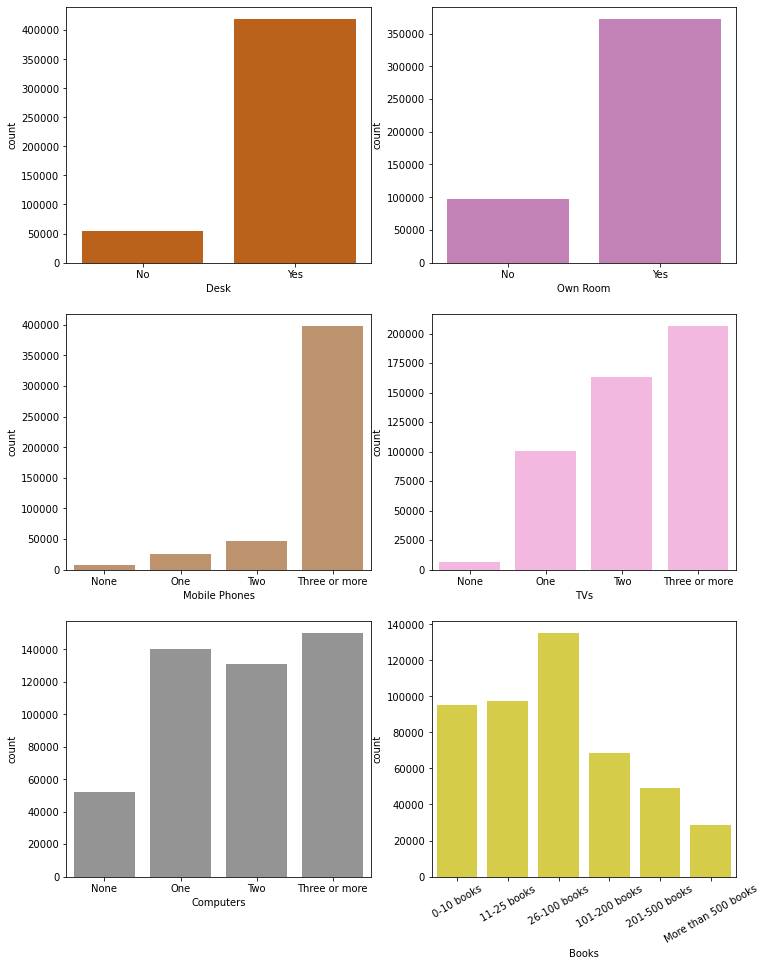

In [39]:
plt.figure(figsize=(12,16))
plt.subplot(3,2,1)
sb.countplot(data=df2, x='desk', color=sb.color_palette('colorblind')[3])
plt.xlabel('Desk')
plt.subplot(3,2,2)
sb.countplot(data=df2, x='own_room', color=sb.color_palette('colorblind')[4])
plt.xlabel('Own Room')
plt.subplot(3,2,3)
sb.countplot(data=df2, x='mobiles', color=sb.color_palette('colorblind')[5])
plt.xlabel('Mobile Phones')
plt.subplot(3,2,4)
sb.countplot(data=df2, x='tvs', color=sb.color_palette('colorblind')[6])
plt.xlabel('TVs')
plt.subplot(3,2,5)
sb.countplot(data=df2, x='computers', color=sb.color_palette('colorblind')[7])
plt.xlabel('Computers')
plt.subplot(3,2,6)
sb.countplot(data=df2, x='books', color=sb.color_palette('colorblind')[8])
plt.xlabel('Books')
plt.xticks(rotation=30);

Here one can see that it's very common for students to have their own desk, and still pretty common for them to have their own room. It's also very common for pupils to have three or more mobile phones per household. It seems likely to me that these categories won't turn out to be very useful in the analysis because they don't differentiate between participants very well, but we shall see. I was expecting the students in the dataset to be a little less WEIRD (Western, Educated, Industrialised, Rich, Developed), but realistically we're looking at educational comparisons between developed countries/regions within countries. This is also manifest from the generally high level of parental education we saw previously.

For TVs, we're seeing a little more differentiation, with many in the 'one' or 'two' televisions per household bins, but it would have been nice if they'd included more categories - generally catch-all options in surveys such as 'three or more' shouldn't be modal. It's a similar story for computers. What's probably happened here is that they're sticking to a design that was appropriate when PISA was first introduced in 2000 but hasn't aged gracefully. They may be useful predictors nonetheless. 

Finally, for the reported number of books per household, we see that 26-100 is the modal class. It's possible that this is a saliency effect as it feels 'about right' if you're trying to estimate something. Nonetheless, there's a good spread of different responses, and it will be interesting to investigate if there are any effects/interactions with our response variables.

That just leaves our two psychological indices - perseverance and openness to problem-solving.

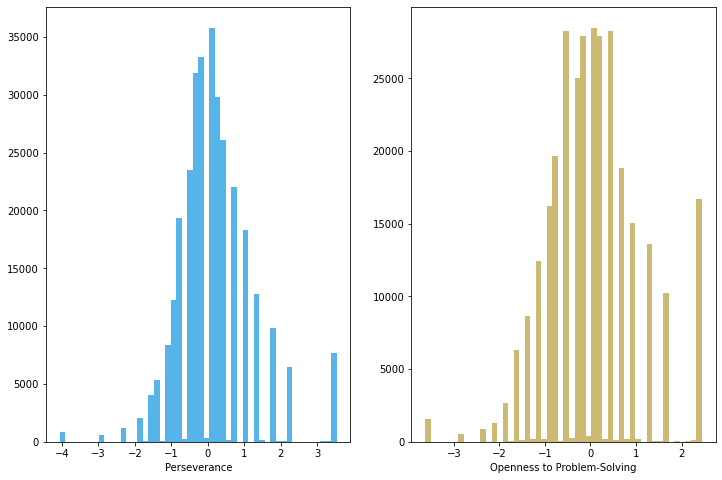

In [40]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.hist(df2['persev'], bins = 50, color=sb.color_palette('colorblind')[9])
plt.xlabel('Perseverance')
plt.subplot(1,2,2)
plt.hist(df2['prob_solv_open'], bins = 50, color=sb.color_palette('deep')[8])
plt.xlabel('Openness to Problem-Solving');

As we saw for age, there are only a limited number of possible values, since the discretised form of the histogram. In both cases we have slight upticks at the extreme right tails of our distributions (3.5286 for perseverance and 2.4465 for openness to problem-solving), indicating we may not have unipolar distributions here. It is tempting to treat these extreme values as anomalous, but there isn't sufficient reason to do so here. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The response variables I'm interested in - the mathematics, reading, and science scores of the students, are all normed to be of mean 500 and standard deviation 100, and they were normally distributed as such. No transformations were necessary.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The most unusual distribution was probably the last one I looked at - the indices used for perseverance and openness to problem-solving. This was interesting because of the sudden spikes at 3.5286 for perseverance and 2.4465 for openness to problem-solving, both right at the extreme right tail of the distribution. It's possible that something like this has occurred due to students filling in their questionnaires in a way that suggested they were giving the answers they felt they should be giving (social desirability bias), but there's insufficient reason here for me to conclude that and thus exclude these values from the data. I will thus leave them as they are.

## Bivariate Exploration

A good place to start here is to examine a plot matrix and examine the relationships between the quantitative variables. What relationships can we see between the quantitative variables?

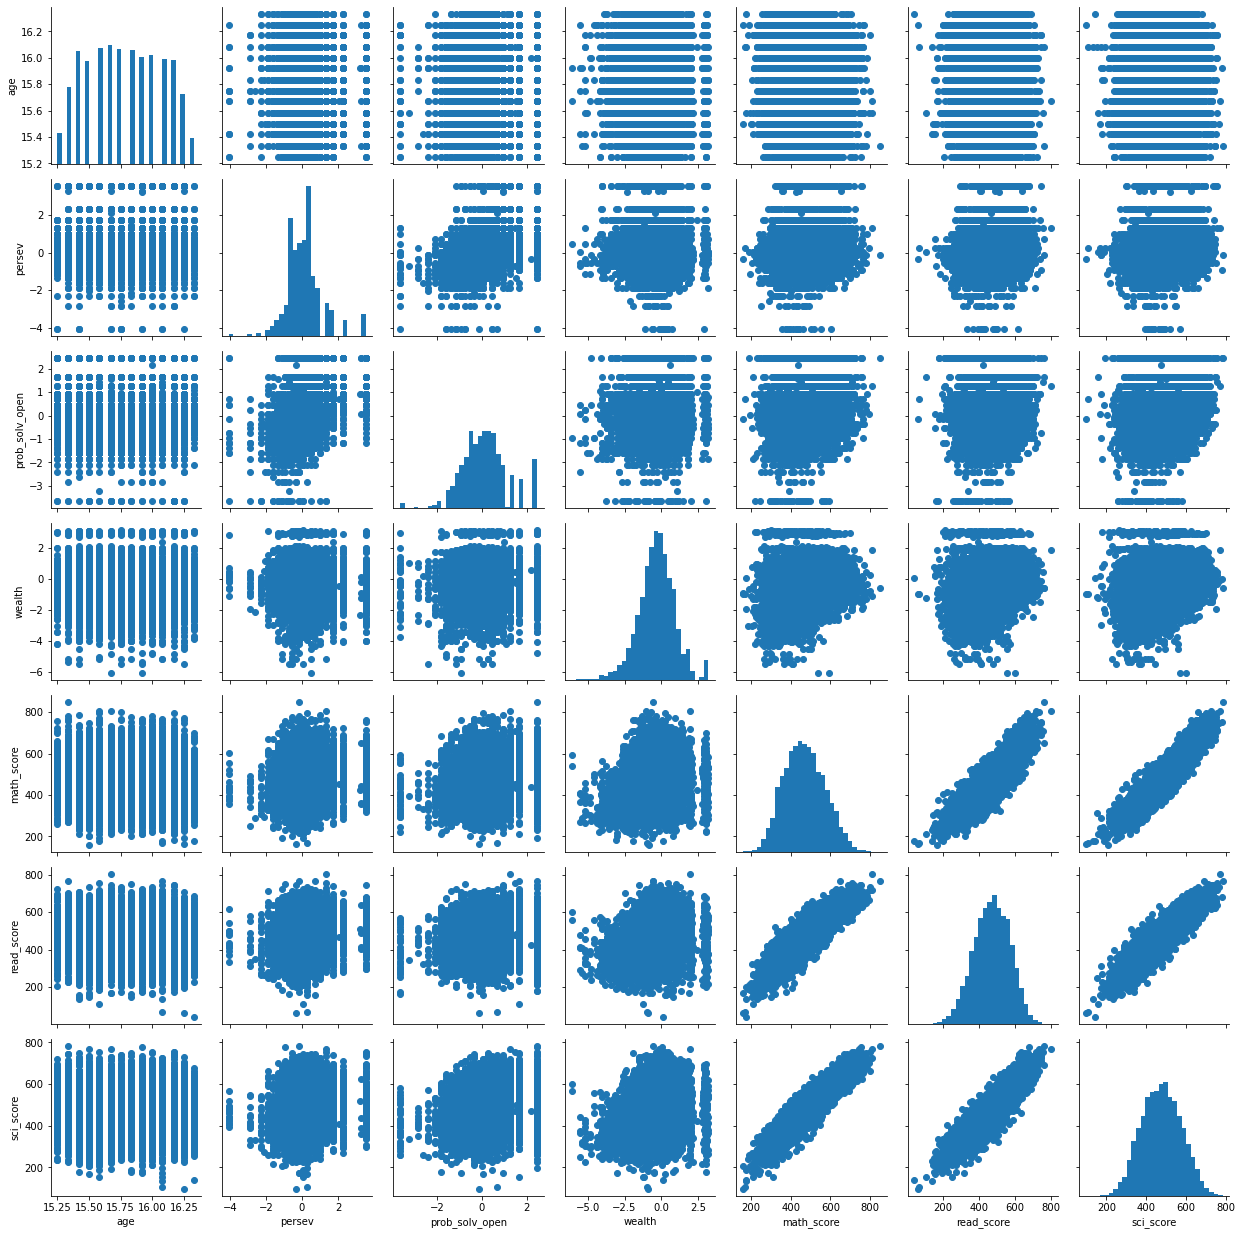

In [41]:
# Picking out the quantitative variables. Leaving overall score out because I already know
# that that will correlate very well with my three response variables, and it's only really
# here as a quick-and-dirty proxy. 
quant_vars = ['age', 'persev', 'prob_solv_open', 'wealth', 'math_score', 'read_score', 'sci_score']

# Samplng 10000 units to make plots clearer
df = df2.sample(10000)

grid = sb.PairGrid(data = df, vars = quant_vars)
grid = grid.map_diag(plt.hist, bins = 30)
grid.map_offdiag(plt.scatter);

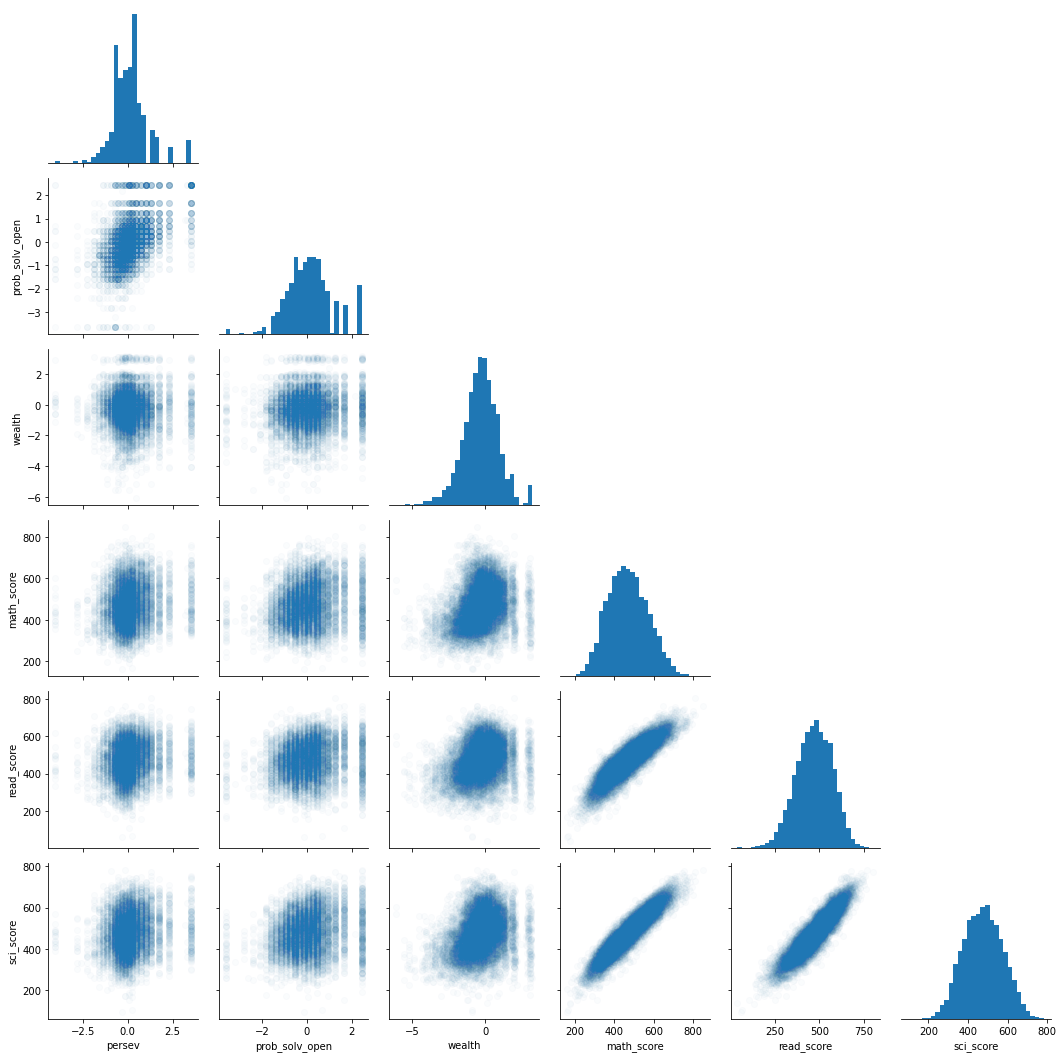

In [42]:
# Dropping age because it has a discretised appearance and should be investigated separately:
quant_vars = ['persev', 'prob_solv_open', 'wealth', 'math_score', 'read_score', 'sci_score']

# Also using transparency and converting to corner plot to make things easier to read.
grid = sb.PairGrid(data = df, vars = quant_vars, corner=True)
grid.map_lower(plt.scatter, alpha=0.02)
grid.map_diag(plt.hist, bins=30);

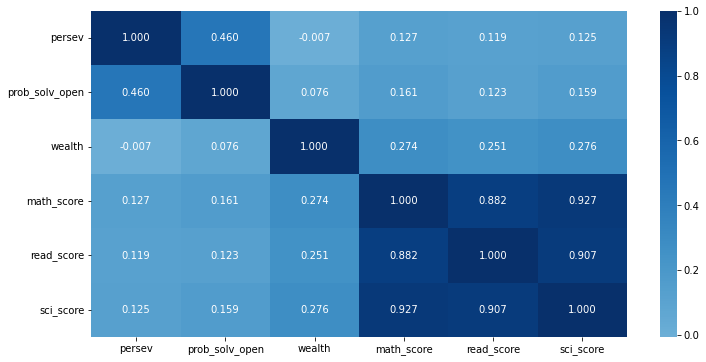

In [43]:
plt.figure(figsize = (12,6))
sb.heatmap(df[quant_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'Blues', center = 0);

There appears to be a weak-to-moderate positive correlation between perseverance and openness to problem-solving (r=0.468). Surprisingly, however, neither of the two psychological indices appear to have much of a relationship at all with any of the student score measures (r < 0.2) - if there is an effect, it is going to be quite muted. Wealth shows a weak, positive correlation with mathematics (r=0.279), reading (r=0.248), and scientific literacy (r=0.27). 

In terms of the relationships between our three response variables, there is a very strong, positive correlation between each pair of variables, though it looks as though the correlation between mathematics score and reading score (r=0.881) is slightly weaker than the correlation between mathematics and science (r=928) or the correlation between reading and science (r=0.904). This strong inter-correlation aligns with the traditional view that there is a single, general factor, '*g*', behind intelligence (or at least, the sort of intelligence that psychometricians typically measure), and that not much is gained by attempting to introduce a more complicated model.

Now, since I dropped age from the plot matrix, I'll now investigate it a little on its own. The question I'm interested in here is: does age have an impact on overall score?

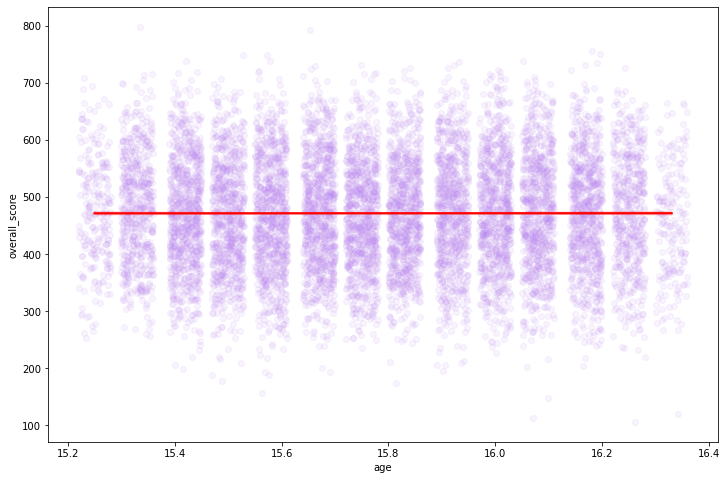

In [44]:
# Using sampling, x jitter, and transparency here to solve overplotting issues in the 
# scatterplot

plt.figure(figsize=(12,8))
sb.regplot(data=df, x='age', y='overall_score', fit_reg=True, x_jitter=0.03,
          scatter_kws={'alpha':0.1, 'color':(0.75,0.55,0.95)}, line_kws={'color':'red'});

Looking at the scatterplot above showing the relationship between age and overall score, there doesn't appear to be any relationship here. At least, if there is an effect, it's so small that it's not possible to discern from a visual inspection of the data.

Onto the effect of sex. I stated earlier that I was anticipating a sex-linked difference in the profile of scores, with the {high maths, low reading} types tending to skew male. This ought to be detectable if we compare the distributions of scores for both sexes across the three response variables of interest via, say, a violin plot.

Do the sexes differ in their distributions of scores?

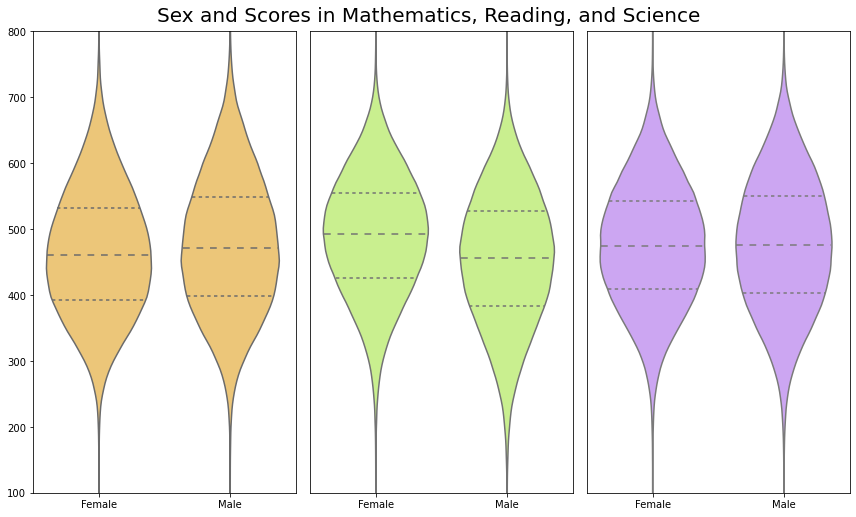

In [45]:
plt.figure(figsize=(12,7))

# Using the df2 dataframe again (i.e. the full dataset), rather than df, the 10000 sample.
plt.subplot(1,3,1)
sb.violinplot(data=df2, x='sex', y='math_score', inner='quartile', color=(1,0.8,0.4))
plt.ylim(100, 800)
plt.ylabel("")
plt.xlabel("")

plt.subplot(1,3,2)
sb.violinplot(data=df2, x='sex', y='read_score', inner='quartile', color=(0.8,1,0.5))
plt.ylim(100, 800)
plt.ylabel("")
plt.yticks([])
plt.xlabel("")

plt.subplot(1,3,3)
sb.violinplot(data=df2, x='sex', y='sci_score', inner='quartile', color=(0.8,0.6,1))
plt.ylim(100, 800)
plt.ylabel("")
plt.yticks([])
plt.xlabel("")

plt.tight_layout()
plt.suptitle('Sex and Scores in Mathematics, Reading, and Science', fontsize=20, y=1.02);

Also plotting a box-plot here as it may be more useful if I end up using this for explanatory purposes:

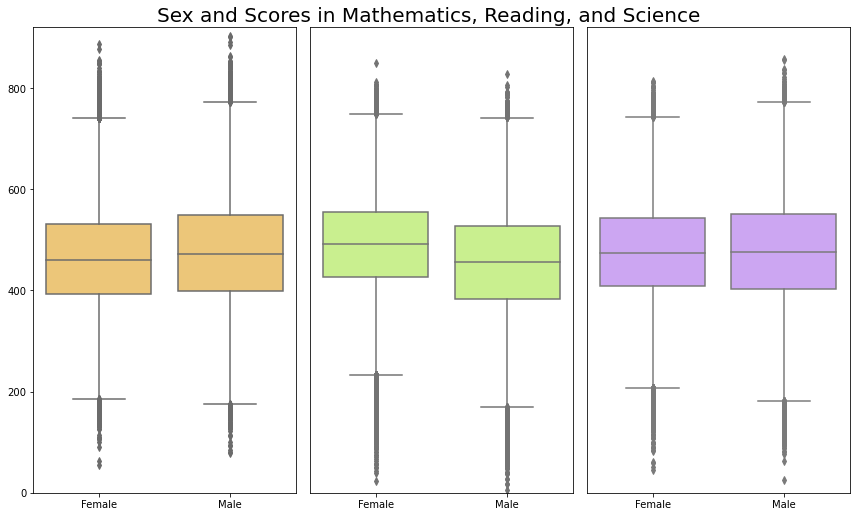

In [46]:
plt.figure(figsize=(12,7))
plt.subplot(1,3,1)
sb.boxplot(data=df2, x='sex', y='math_score', color=(1,0.8,0.4))
plt.ylim(0, 920)
plt.ylabel("")
plt.xlabel("")

plt.subplot(1,3,2)
sb.boxplot(data=df2, x='sex', y='read_score', color=(0.8,1,0.5))
plt.ylim(0, 920)
plt.ylabel("")
plt.yticks([])
plt.xlabel("")

plt.subplot(1,3,3)
sb.boxplot(data=df2, x='sex', y='sci_score', color=(0.8,0.6,1))
plt.ylim(0, 920)
plt.ylabel("")
plt.yticks([])
plt.xlabel("")

plt.tight_layout()
plt.suptitle('Sex and Scores in Mathematics, Reading, and Science', fontsize=20, y=1.02);

The main point of interest here is the relatively sizeable difference in reading scores, with males scoring below females. There's also some right skew to the male distribution, indicating that there's a preponderance of lower-performing males in terms of reading when really we're expecting it to be a normally-distributed thing. 

A similar thing is true, but to a lesser extent when it comes to females and mathematics. The distribution is again right-skewed when really we'd expect it to be normally-distributed. 

For science, however, things are more or less even. There's perhaps evidence of greater variation amongst the males, but if there is, it's quite a small difference. 

In terms of visualisation, I think I may prefer the violin plots here over the box plots because you can see the skew a bit better, but 

Onto highest parental education, then. What is the relationship between highest parental education level and the student scores?

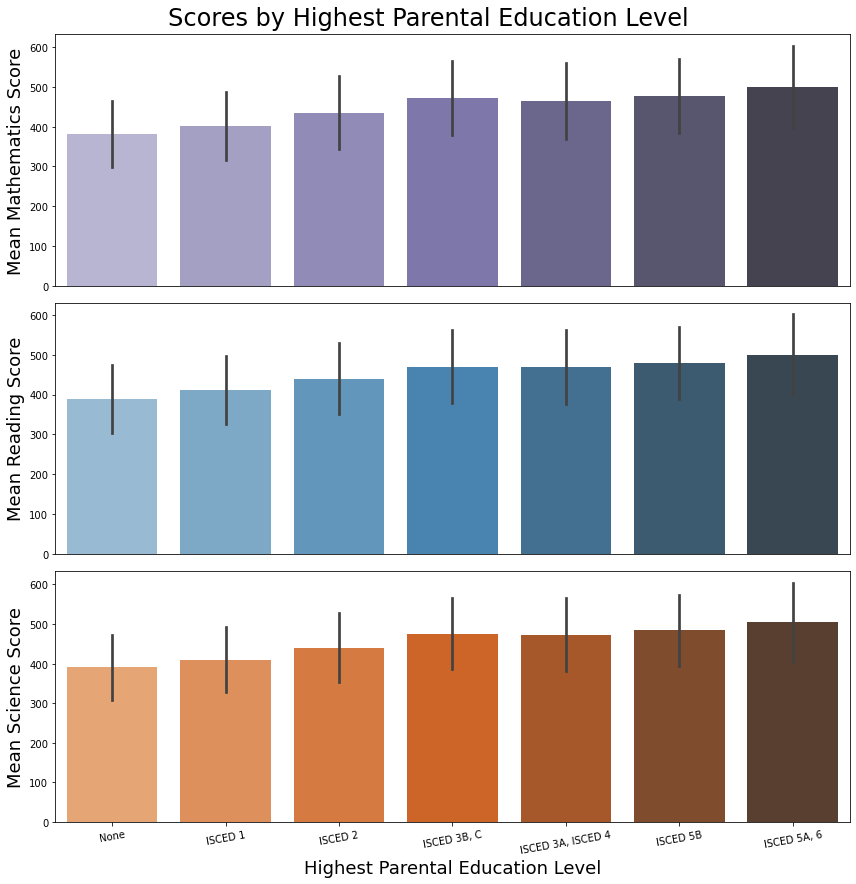

In [47]:
plt.figure(figsize=(12,12))

plt.subplot(3,1,1)
sb.barplot(data=df2, x='highest_par_ed', y='math_score',
        palette='Purples_d', ci='sd')
plt.xticks([])
plt.xlabel("")
plt.ylabel('Mean Mathematics Score', fontsize=18)

plt.subplot(3,1,2)
sb.barplot(data=df2, x='highest_par_ed', y='read_score',
        palette='Blues_d', ci='sd')
plt.xticks([])
plt.xlabel("")
plt.ylabel('Mean Reading Score', fontsize=18)

plt.subplot(3,1,3)
sb.barplot(data=df2, x='highest_par_ed', y='sci_score',
        palette='Oranges_d', ci='sd')
plt.xticks(rotation=10)
plt.xlabel('Highest Parental Education Level', fontsize=18)
plt.ylabel('Mean Science Score', fontsize=18)
plt.tight_layout()
plt.suptitle('Scores by Highest Parental Education Level', fontsize=24, y=1.02);

Here we see evidence of a relationship between parental education level and the mean score of the student. As the education level increases, the mean score achieved by the student increases, and this effect is visible on all three response variables. The standard deviations (indicated by the black lines) are roughly the same for all categories.

We can compose a very similar plot for truancy level. What is the relationship between the number of unauthorised day absences and scores?

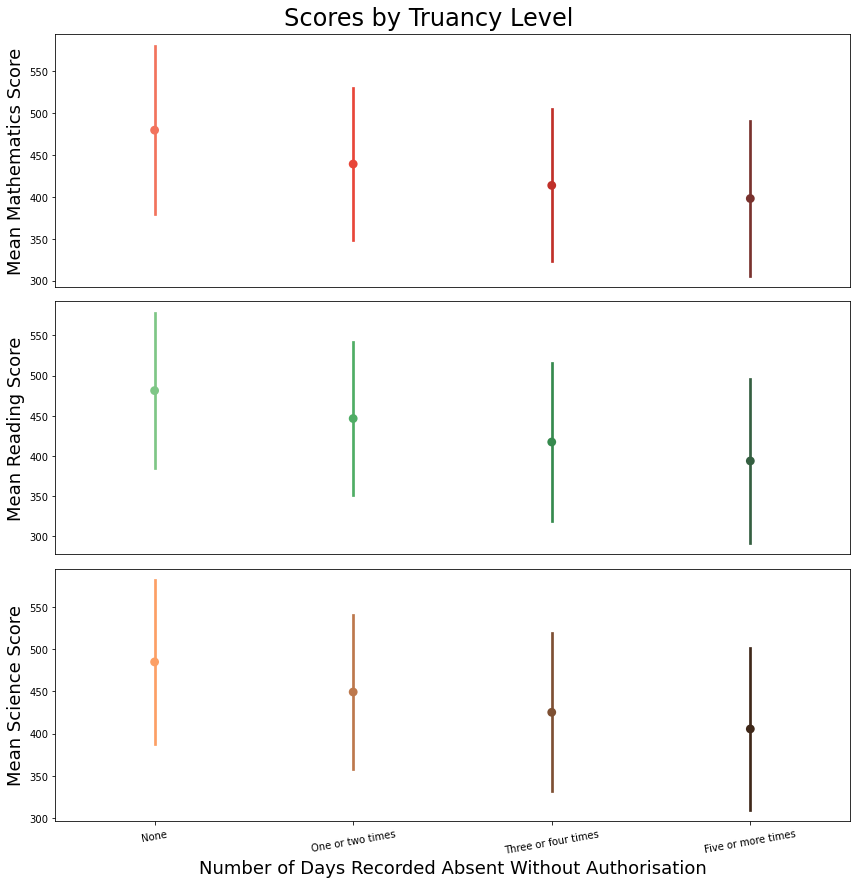

In [48]:
plt.figure(figsize=(12,12))

plt.subplot(3,1,1)
sb.pointplot(data=df2, x='day_truant', y='math_score',
        palette='Reds_d', ci='sd')
plt.xticks([])
plt.xlabel("")
plt.ylabel('Mean Mathematics Score', fontsize=18)

plt.subplot(3,1,2)
sb.pointplot(data=df2, x='day_truant', y='read_score',
        palette='Greens_d', ci='sd')
plt.xticks([])
plt.xlabel("")
plt.ylabel('Mean Reading Score', fontsize=18)

plt.subplot(3,1,3)
sb.pointplot(data=df2, x='day_truant', y='sci_score',
        palette='copper_r', ci='sd')
plt.xticks(rotation=10)
plt.xlabel('Number of Days Recorded Absent Without Authorisation', fontsize=18)
plt.ylabel('Mean Science Score', fontsize=18)
plt.tight_layout()
plt.suptitle('Scores by Truancy Level', fontsize=24, y=1.02);

The effect is a fair bit less dramatic than you'd think it would be, but you do see the relationship you'd expect - pupils with a higher truancy rate also tend to have a lower reading, mathematics, and science score on the PISA test. The standard deviations appear to be more or less the same for all three response variables.

Moving on now to the possessions. Here I'm just going to do plots for the overall score and combine them into one plot. 

Is there a relationship between household possessions and student score?

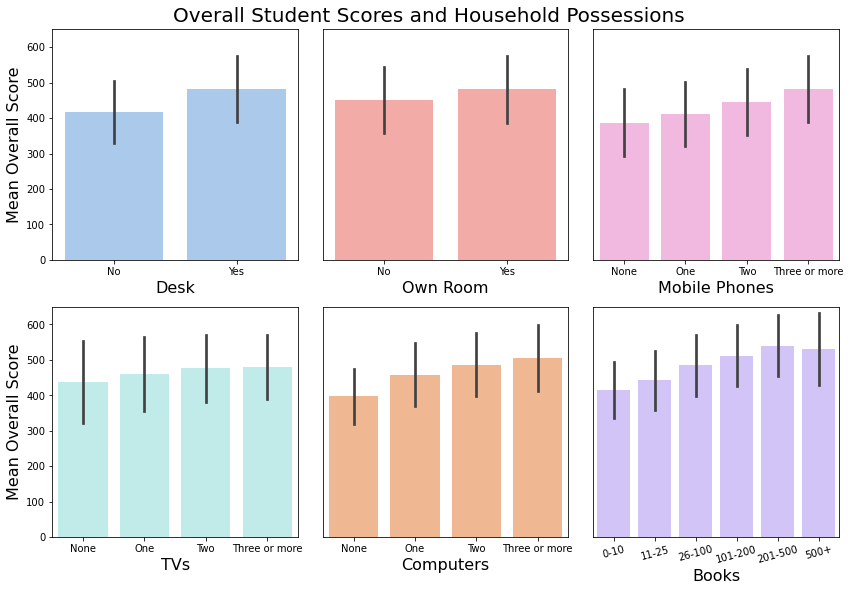

In [49]:
plt.figure(figsize=(12,8))

plt.subplot(2,3,1)
sb.barplot(data=df2, x='desk', y='overall_score', ci='sd', 
           color=sb.color_palette('pastel')[0])
plt.xlabel('Desk', fontsize=16)
plt.ylabel('Mean Overall Score', fontsize=16)
plt.ylim(0,650)

plt.subplot(2,3,2)
sb.barplot(data=df2, x='own_room', y='overall_score', ci='sd', 
           color=sb.color_palette('pastel')[3])
plt.xlabel('Own Room', fontsize=16)
plt.ylabel('', fontsize=16)
plt.yticks([])
plt.ylim(0,650)

plt.subplot(2,3,3)
sb.barplot(data=df2, x='mobiles', y='overall_score', ci='sd',
           color=sb.color_palette('pastel')[6])
plt.xlabel('Mobile Phones', fontsize=16)
plt.ylabel('', fontsize=16)
plt.yticks([])
plt.ylim(0,650)

plt.subplot(2,3,4)
sb.barplot(data=df2, x='tvs', y='overall_score', ci='sd',
           color=sb.color_palette('pastel')[9])
plt.xlabel('TVs', fontsize=16)
plt.ylabel('Mean Overall Score', fontsize=16)
plt.ylim(0,650)

plt.subplot(2,3,5)
sb.barplot(data=df2, x='computers', y='overall_score', ci='sd',
           color=sb.color_palette('pastel')[1])
plt.xlabel('Computers', fontsize=16)
plt.ylabel('', fontsize=16)
plt.yticks([])
plt.ylim(0,650)

plt.subplot(2,3,6)
sb.barplot(data=df2, x='books', y='overall_score', ci='sd',
           color=sb.color_palette('pastel')[4])
plt.xlabel('Books', fontsize=16)
plt.xticks([0,1,2,3,4,5], labels=['0-10', '11-25', '26-100', '101-200', '201-500', 
                                  '500+'], rotation=15)
plt.ylabel('', fontsize=16)
plt.yticks([])
plt.ylim(0,650)

plt.tight_layout()
plt.suptitle('Overall Student Scores and Household Possessions', fontsize=20, y=1.02);

Unsurprisingly, there appears to be a positive relationship between a student's having a desk to work on, and their grades. Similarly for them having their own room, although it looks to be somewhat more muted, which is the opposite way round to what I'd have expected. 

In general, it looks as though all of the possessions indicators have the same basic pattern - more stuff is a proxy for greater household wealth, and household wealth is associated with higher student scores. 

Of slightly more interest perhaps is the books factor, since we see an apparent slight decline in the mean student score as we move from the '201-500 books' category to the 'More than 500' category. It's worth investigating further. Perhaps there is a kind of 'bookworm effect', where a certain number of books is helpful for bolstering reading, but beyond which proves detrimental to mathematics and science study? 

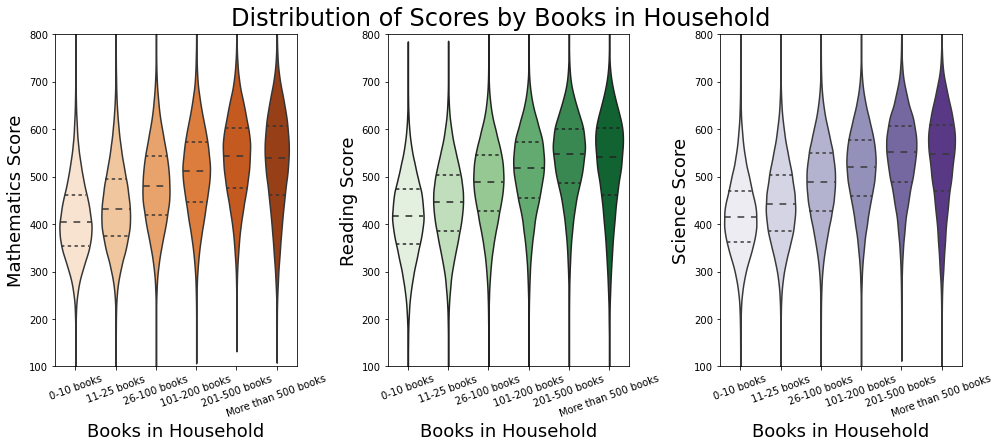

In [50]:
plt.figure(figsize=(14,6))

plt.subplot(1,3,1)
sb.violinplot(data=df2, x='books', y='math_score', palette='Oranges', inner='quartile')
plt.xticks(rotation=20)
plt.ylabel('Mathematics Score', fontsize=18)
plt.xlabel('Books in Household', fontsize=18)
plt.ylim(100, 800)

plt.subplot(1,3,2)
sb.violinplot(data=df2, x='books', y='read_score', palette='Greens', inner='quartile')
plt.xticks(rotation=20)
plt.ylabel('Reading Score', fontsize=18)
plt.xlabel('Books in Household', fontsize=18)
plt.ylim(100, 800)

plt.subplot(1,3,3)
sb.violinplot(data=df2, x='books', y='sci_score', palette='Purples', inner='quartile')
plt.xticks(rotation=20)
plt.xlabel('Books in Household', fontsize=18)
plt.ylabel('Science Score', fontsize=18)
plt.ylim(100, 800)
plt.tight_layout()
plt.suptitle('Distribution of Scores by Books in Household', fontsize=24, y=1.03);

There doesn't appear to be anything particularly different about the effect on reading here. The distributions are more or less identical, with that slight drop in mean/median as we move from the penultimate to the last category. It's also true that the student scores in the last category are more variable, and left-skewed too. 

But perhaps there is a relationship between the number of books and the number of computers? Do households of bibliophiles tend to eschew computers, or does it follow the same pattern of both been indicators of underlying wealth? 

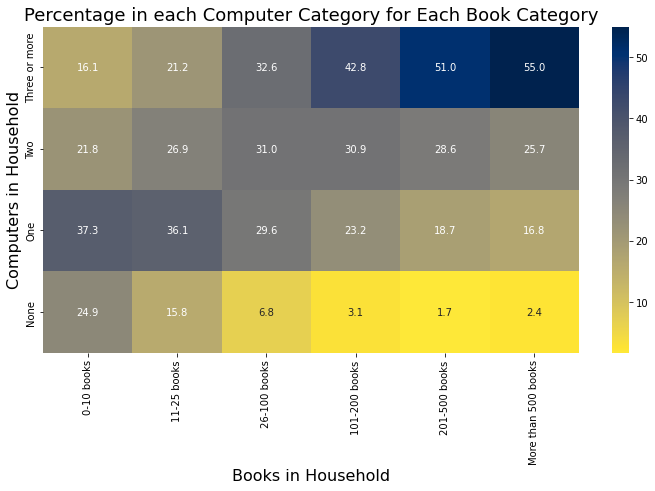

In [51]:
# Creating a summary table so that we can do a heatmap
df = df2.groupby(['books', 'computers']).size().reset_index(name='counts')
df = df.pivot(index='computers', columns='books', values='counts').sort_index(ascending=False)

# Transforming so that each column is now relative frequency (i.e. proportion within that 
# category of books per household), expressed as a percentage
df = df.transform(lambda x: 100*x / x.sum())

# Plotting the heatmap
plt.figure(figsize=(12,6))
sb.heatmap(df, annot=True, fmt='.1f', cmap='cividis_r')
plt.xlabel('Books in Household', fontsize=16)
plt.ylabel('Computers in Household', fontsize=16);
plt.title('Percentage in each Computer Category for Each Book Category', fontsize=18);

The heatmap above shows the percentages of households within each book category that have 0, 1, 2, or 3+ computers in their household. As you can see, as the the number of books per household increases, the relative frequency of the computers increases too. This again seems to correspond to our basic model that all the possessions indices are really just functioning as proxies for wealth. There doesn't appear to be anything special about books.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Much of the Bivariate Exploration phase hasn't revealed anything particularly exciting. We've seen that the 3 response variables (mathematics, reading and science scores) are tightly inter-correlated, that the psychological indices of perseverance and openness to problem-solving aren't especially important in terms of predicting scores, that truancy is associated with lower scores, but that in general any sort of indicator of wealth is associated with increasing scores, albeit to different degrees. I also detected a slight difference in the distribution of scores between males and females, with females tending to score higher on reading, and males tending to score higher on mathematics. The effect is not very big, however.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

I was hoping there might be something interesting to be seen with the number of books - e.g. a distinctive relationship with reading in particular, or some trade-off between books and computers, but there simply wasn't anything that exciting in the data, unfortunately. In general, it looks as though possessions are only interesting as indicators of wealth, and thus I'll discontinue studying possessions in their own right in the multivariate exploration phase.

## Multivariate Exploration

We've already seen how there is a subtle difference in the male and female distributions when it comes to reading and mathematics scores. A natural question to ask here is if there is an interaction between sex and other factors when it comes to scores. Males seem to have a left-skewed distribution on reading, which suggests that there may be a number of males who are reading a fair bit below their potential. One question we could ask, then, is whether there's an interaction with wealth. Is the combination of (poor, male) substantially worse in terms of reading score than the combination of (poor, female)?

C:\Users\jamie\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


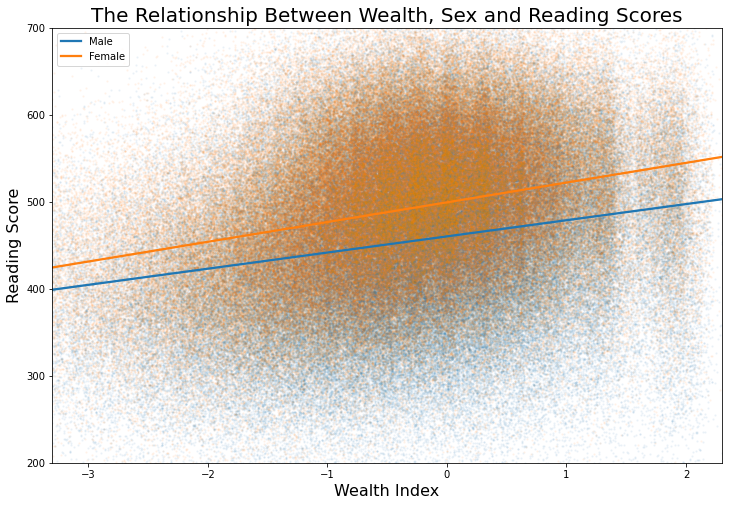

In [52]:
plt.figure(figsize=(12,8))
sb.regplot(data=df2[df2['sex']=='Male'], x='wealth', y='read_score',
          scatter_kws={'alpha':0.05, 's':2}, x_jitter=0.2)
sb.regplot(data=df2[df2['sex']=='Female'], x='wealth', y='read_score',
          scatter_kws={'alpha':0.05, 's':2}, x_jitter=0.2)
plt.xlim(-3.3,2.3)
plt.title("The Relationship Between Wealth, Sex and Reading Scores", fontsize=20)
plt.xlabel("Wealth Index", fontsize=16)
plt.ylabel("Reading Score", fontsize=16)
plt.ylim(200, 700)
plt.legend(labels=['Male', 'Female']);

This visualisation here isn't very good because the overlapping colours is confusing and lacks any sort of natural interpretation, but what you can observe is that there is indeed an interaction effect here since the gradient of the regression lines are quite clearly different. Specifically, the reading scores for females increase faster as wealth increases than they do for males.

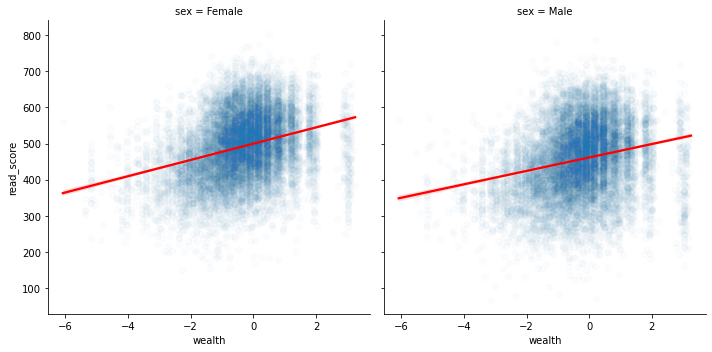

In [53]:
df = df2.sample(25000)

g=sb.FacetGrid(data=df, col='sex', height=5)
g.map(sb.regplot, 'wealth', 'read_score', scatter_kws={'alpha':0.02}, line_kws={'color':'red'});

The visualisation here isn't terribly compelling either. I think I'm probably best off with a smaller sample without any transparency, a smaller marker size, and a little bit of x_jitter.

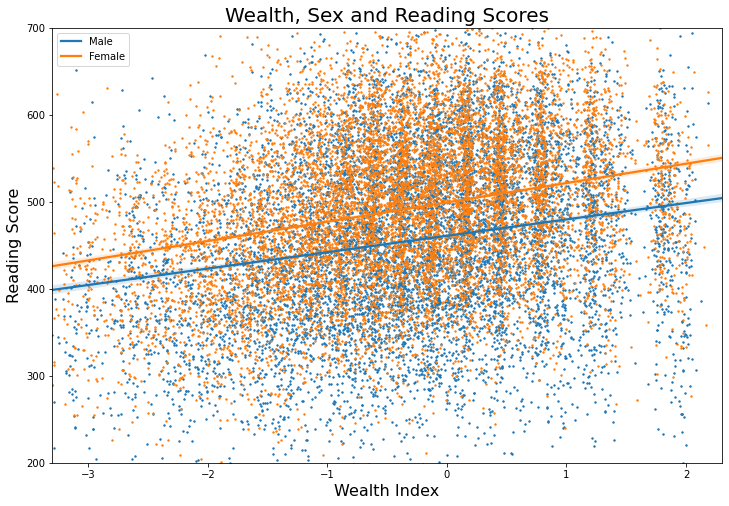

In [54]:
df = df2.sample(20000)
plt.figure(figsize=(12,8))
sb.regplot(data=df[df['sex']=='Male'], x='wealth', y='read_score',
          scatter_kws={'alpha':1, 's':2}, x_jitter=0.05)
sb.regplot(data=df[df['sex']=='Female'], x='wealth', y='read_score',
          scatter_kws={'alpha':1, 's':2}, x_jitter=0.05)
plt.xlim(-3.3,2.3)
plt.title("Wealth, Sex and Reading Scores", fontsize=20)
plt.xlabel("Wealth Index", fontsize=16)
plt.ylabel("Reading Score", fontsize=16)
plt.ylim(200, 700)
plt.legend(labels=['Male', 'Female']);

Now I just want to see if a similar thing happens for mathematics and science, and also do some calculations to back up my eyeball judgements:

C:\Users\jamie\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


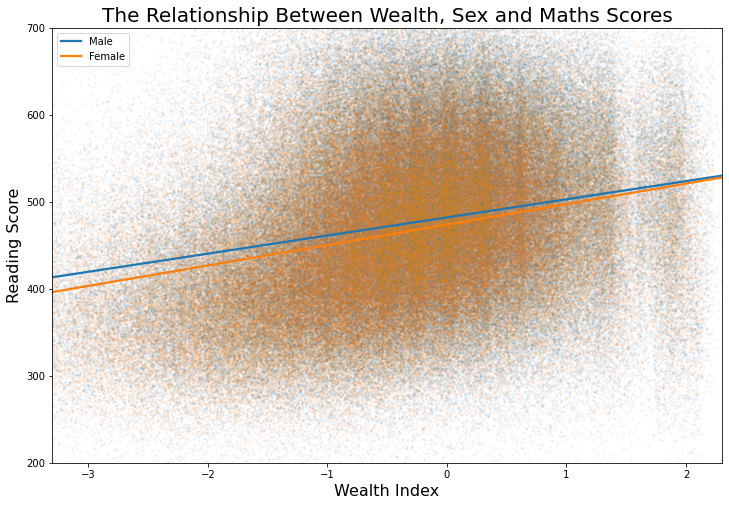

In [55]:
df = df2.sample(20000)
plt.figure(figsize=(12,8))
sb.regplot(data=df2[df2['sex']=='Male'], x='wealth', y='math_score',
          scatter_kws={'alpha':0.05, 's':2}, x_jitter=0.2)
sb.regplot(data=df2[df2['sex']=='Female'], x='wealth', y='math_score',
          scatter_kws={'alpha':0.05, 's':2}, x_jitter=0.2)
plt.xlim(-3.3,2.3)
plt.title("The Relationship Between Wealth, Sex and Maths Scores", fontsize=20)
plt.xlabel("Wealth Index", fontsize=16)
plt.ylabel("Reading Score", fontsize=16)
plt.ylim(200, 700)
plt.legend(labels=['Male', 'Female']);

C:\Users\jamie\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


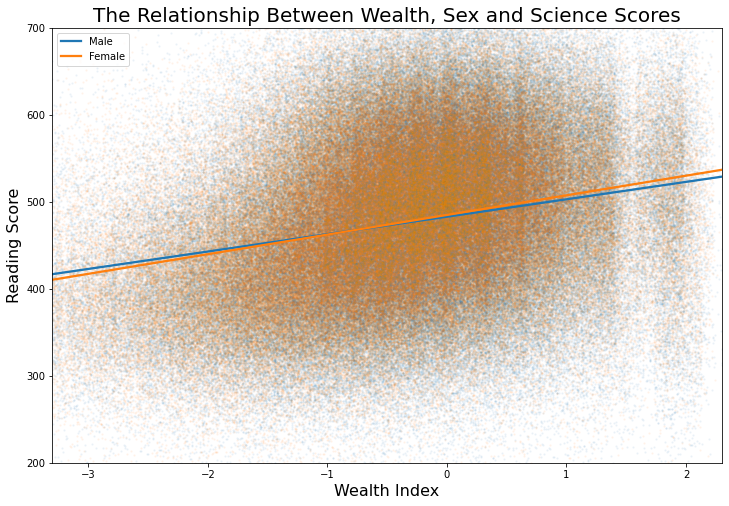

In [56]:
df = df2.sample(20000)
plt.figure(figsize=(12,8))
sb.regplot(data=df2[df2['sex']=='Male'], x='wealth', y='sci_score',
          scatter_kws={'alpha':0.05, 's':2}, x_jitter=0.2)
sb.regplot(data=df2[df2['sex']=='Female'], x='wealth', y='sci_score',
          scatter_kws={'alpha':0.05, 's':2}, x_jitter=0.2)
plt.xlim(-3.3,2.3)
plt.title("The Relationship Between Wealth, Sex and Science Scores", fontsize=20)
plt.xlabel("Wealth Index", fontsize=16)
plt.ylabel("Reading Score", fontsize=16)
plt.ylim(200, 700)
plt.legend(labels=['Male', 'Female']);

In [57]:
df_male = df2[(df2['sex']=='Male')][['read_score', 'sci_score', 'math_score', 'wealth']].dropna()
df_male['intercept']=1
mread = sm.OLS(df_male['read_score'], df_male[['intercept','wealth']]).fit()
msci = sm.OLS(df_male['sci_score'], df_male[['intercept','wealth']]).fit()
mmath = sm.OLS(df_male['math_score'], df_male[['intercept','wealth']]).fit()

df_female = df2[(df2['sex']=='Female')][['read_score', 'sci_score', 'math_score', 'wealth']].dropna()
df_female['intercept']=1
fread = sm.OLS(df_female['read_score'], df_female[['intercept','wealth']]).fit()
fsci = sm.OLS(df_female['sci_score'], df_female[['intercept','wealth']]).fit()
fmath = sm.OLS(df_female['math_score'], df_female[['intercept','wealth']]).fit()

print('Reading', fread.params / mread.params)
print('Science', fsci.params / msci.params)
print('Maths', fmath.params / mmath.params)

Reading intercept    1.085075
wealth       1.221792
dtype: float64
Science intercept    1.004193
wealth       1.127497
dtype: float64
Maths intercept    0.983030
wealth       1.128536
dtype: float64


Aha! An interesting effect at last. There's a definite interaction when it comes to reading scores between wealth and sex (with a regression line for females that's 22% steeper than it is for males). However, the interaction is less marked for wealth and sex whenit comes to mathematics scores and science scores (with a regression line for females that's 13% steeper than it is for males in both cases). For some reason, increasing wealth has more of an impact on females than it does males, and this effect is most pronounced when it comes to reading scores.

Another thing that might have an interesting interaction with wealth is highest parental education. Is it the case that pupils with parents who are wealthy and well-educated perform better over and above the expected effects of wealth and education alone? And which has the stronger relationship with test scores - increasing the highest parental education level, or increasing the household wealth?

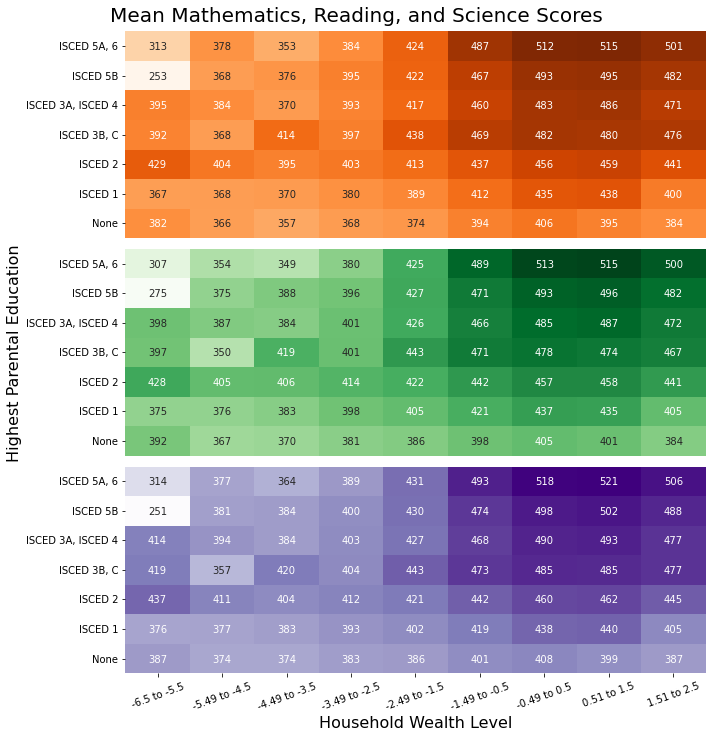

In [58]:
df = df2.copy()

wealthbins = np.arange(-6.5, 3.5, 1)
df['wealthcat'] = pd.cut(df['wealth'], wealthbins, labels=(wealthbins[:-1]+0.5))

plt.figure(figsize=(10,10))
plt.subplot(3,1,1)

means = df.groupby(['wealthcat', 'highest_par_ed'])['math_score'].mean().reset_index(name='means')
means = means.pivot(index='highest_par_ed', columns='wealthcat', values='means').sort_index(ascending=False)

sb.heatmap(means, annot = True, fmt = '.0f', cmap='Oranges', cbar=False)
plt.xlabel("")
plt.ylabel("")
plt.xticks([])

plt.subplot(3,1,2)

means = df.groupby(['wealthcat', 'highest_par_ed'])['read_score'].mean().reset_index(name='means')
means = means.pivot(index='highest_par_ed', columns='wealthcat', values='means').sort_index(ascending=False)

sb.heatmap(means, annot = True, fmt = '.0f', cmap='Greens', cbar=False)
plt.xlabel("")
plt.ylabel('Highest Parental Education', fontsize=16)
plt.xticks([])

plt.subplot(3,1,3)

means = df.groupby(['wealthcat', 'highest_par_ed'])['sci_score'].mean().reset_index(name='means')
means = means.pivot(index='highest_par_ed', columns='wealthcat', values='means').sort_index(ascending=False)

sb.heatmap(means, annot = True, fmt = '.0f', cmap='Purples', cbar=False)
plt.xlabel('Household Wealth Level', fontsize=16)
plt.ylabel("")
plt.xticks([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5], rotation = 20,
           labels=['-6.5 to -5.5', '-5.49 to -4.5', '-4.49 to -3.5', '-3.49 to -2.5', 
                   '-2.49 to -1.5', '-1.49 to -0.5', '-0.49 to 0.5', '0.51 to 1.5', '1.51 to 2.5'])
plt.tight_layout()
plt.suptitle("Mean Mathematics, Reading, and Science Scores", fontsize=20, y=1.02);

The same pattern can be observed on all three response variables - generally, mean scores increase as wealth increases, except for the '1.51 to 2.5' category, where it appears to reverse. Mean scores generally also increase as one moves up the levels of highest parental education, although the effect isn't as pronounced as with wealth.

There also appears to be some interaction here. When it comes to higher wealth levels (-1.49 to -0.5, -0.49 to 0.5, and 0.51 to 1.5), it is clear that the higher the parental education level, the better. In all three of these wealth levels, the highest mean is recorded in the 'ISCED 5A, 6' category (advanced tertiary education). However, for wealth levels below -1.5, the highest mean scores are recorded in the 'ISCED 3B, C' or 'ISCED 2' categories for highest parental education.

Interpreting this result is tricky. It's possible (probable?) that this is merely an artefact of the relatively low numbers of people who tend to fall in such groups, since generally higher parental education will mean higher household wealth. It may also be that there is a demotivating effect along the lines of "Study really hard at school, and you too can earn a pittance just like me!", a sentiment that many millennials will no doubt recognise. Bromides about the joys of learning for learning's sake may not be the best for motivating teenagers.

Talking about motivation, I thought it might be good to return to our psychological indices, perserverence and openness to problem-solving. We saw earlier in the plot matrix that any correlations with our response variables aren't terribly dramatic, but I was interested in whether the combination of the two might show something more interesting. 

Seeing as all three of the variables I'm interested in here (persev, prob_solv_open, math_score/read_score/sci_score) are quantitative, one option is to use a scattergraph with hue as the encoding for the response variable. I'll try this first.

What is the relationship between our psychological variables considered together and test scores?

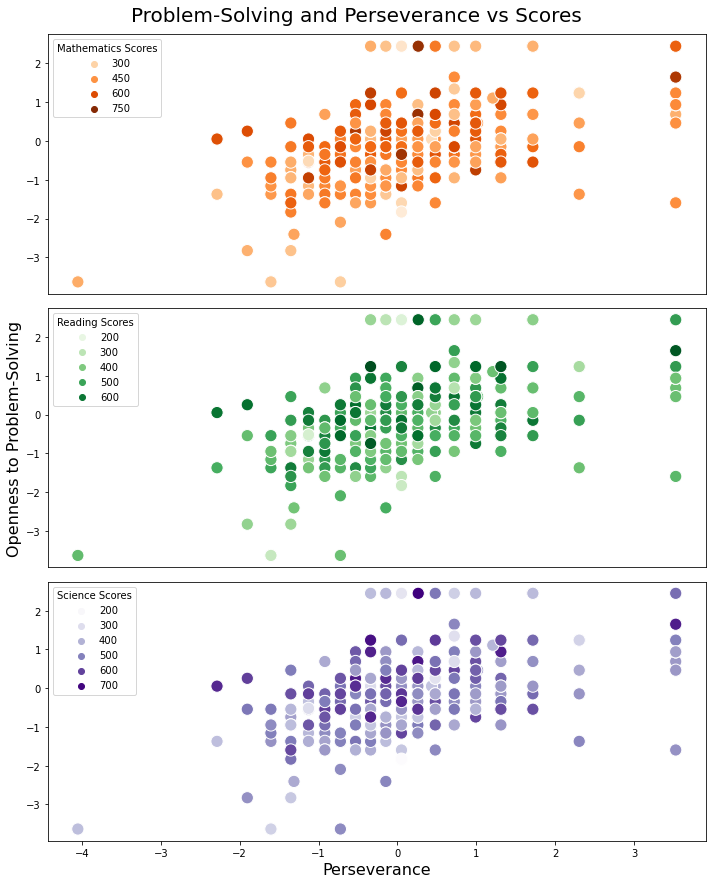

In [59]:
df = df2.sample(500)
plt.figure(figsize=(10,12))

plt.subplot(3,1,1)
sb.scatterplot(data=df, x='persev', y='prob_solv_open', hue='math_score', palette='Oranges',
               alpha=1, s=150)
plt.legend(title="Mathematics Scores", loc=2)
plt.xlabel("", fontsize=16)
plt.ylabel("", fontsize=16)
plt.xticks([])

plt.subplot(3,1,2)
sb.scatterplot(data=df, x='persev', y='prob_solv_open', hue='read_score', palette='Greens',
               alpha=1, s=150)
plt.legend(title="Reading Scores", loc=2)
plt.xlabel("", fontsize=16)
plt.ylabel("Openness to Problem-Solving", fontsize=16)
plt.xticks([])

plt.subplot(3,1,3)
sb.scatterplot(data=df, x='persev', y='prob_solv_open', hue='sci_score', palette='Purples', 
               alpha=1, s=150)
plt.legend(title="Science Scores", loc=2)
plt.xlabel("Perseverance", fontsize=16)
plt.ylabel("", fontsize=16)
plt.tight_layout()
plt.suptitle("Problem-Solving and Perseverance vs Scores", fontsize=20, y=1.02);

Here we see the moderate, positive correlation between perseverance and openness to problem-solving we observed earlier, but only scant indication, if any, that either is particularly associated with higher test scores. Even if you include the effect of high self-reported values in both, there doesn't appear to be any particular effect on test scores. I won't labour the point by trying to produce other representations of this uninteresting plot.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The relationship between the psychological indices and test scores turned out not to be terribly interesting, unfortunately. If there is a relationship between self-reported perseverance and openness to problem-solving and test scores, it is very small. 

However, I did observe effects when it came to wealth and highest parental education. Mean test scores increased as wealth increased, and as one moved up the levels of highest parental education. There was also some interaction in that, at higher wealth levels, those with the highest parental education fared the best on average in tests, but at lower wealth levels, it was those with parents at a lower secondary or vocational/pre-vocational upper secondary level that scored the highest on average. 

### Were there any interesting or surprising interactions between features?

The interaction when it came to reading scores between wealth and sex was an interesting feature for me. I ended up with a regression line for females that's 22% steeper than it is for males, whereas it was only 13% steeper when it comes to the mathematics and science scores. As wealth increases, this has more of an impact on the test scores of females than it does males, but this effect is most pronounced when it comes to reading scores.

## Conclusions

* There is a close intercorrelation between mathematics, reading and science scores, with r-values around 0.9.
* Age, perserverance, and openness to problem-solving showed no visually discernible relationship with student test scores.
* Greater rates of truancy are associated with lower student test scores.

### Wealth

* Having more possessions results in generally higher test scores. This is true for the different response variables. In general, measuring possessions functions merely as a proxy for wealth.
* Having more books does not have any special effect on reading over and above its effect on mathematics or science. The relationship was a simple case of: as the number of books in the household increases, so do the test scores.
* Households with more books also tended to also have more computers, further underlining the fact that we're basically measuring wealth here.
* Wealth and highest parental education level are both associated with higher average test scores in their category. However, when it comes to lower wealth levels, the pupils with the highest average test scores tended to come from households where the highest parental education levels are secondary/vocational.

### Sex

* Females tend to have higher reading scores than males, with males having a slightly right-skewed distribution. Males tend to have higher mathematics scores than females, with females also displaying a slightly right-skewed distribution.

### Wealth and Sex

* Sex interacts with wealth, especially for reading scores. Females reading scores improve quicker than male scores as wealth increases.